In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data=pd.read_csv("data.csv")

空值判断

In [2]:
data.isnull().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
y      0
dtype: int64

数据概览

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,20.0,5.579520e+06,1.262195e+06,3831732.000,4.525117e+06,5308896.500,6.594658e+06,7599295.000
x2,20.0,7.650350e+02,5.956983e+02,181.540,3.022200e+02,565.940,1.033535e+03,2110.780
x3,20.0,2.370825e+03,1.919167e+03,448.190,9.766600e+02,1586.020,3.294485e+03,6882.850
x4,20.0,1.964469e+04,1.020302e+04,7571.000,1.182782e+04,15943.375,2.588994e+04,42049.140
x5,20.0,1.587095e+04,8.199771e+03,6212.700,9.669163e+03,12345.705,2.133219e+04,33156.830
x6,20.0,7.350514e+06,6.213419e+05,6370241.000,6.822868e+06,7314304.000,7.867810e+06,8323096.000
x7,20.0,1.712239e+03,1.184714e+03,525.710,8.484025e+02,1262.050,2.244117e+03,4454.550
x8,20.0,5.705799e+03,4.478400e+03,985.310,2.077765e+03,4104.585,8.500087e+03,15420.140
x9,20.0,1.294935e+02,5.050983e+01,60.620,9.185750e+01,113.530,1.699625e+02,228.460
x10,20.0,3.402165e+02,2.515779e+02,65.660,1.432375e+02,235.760,5.210650e+02,852.560


箱线图

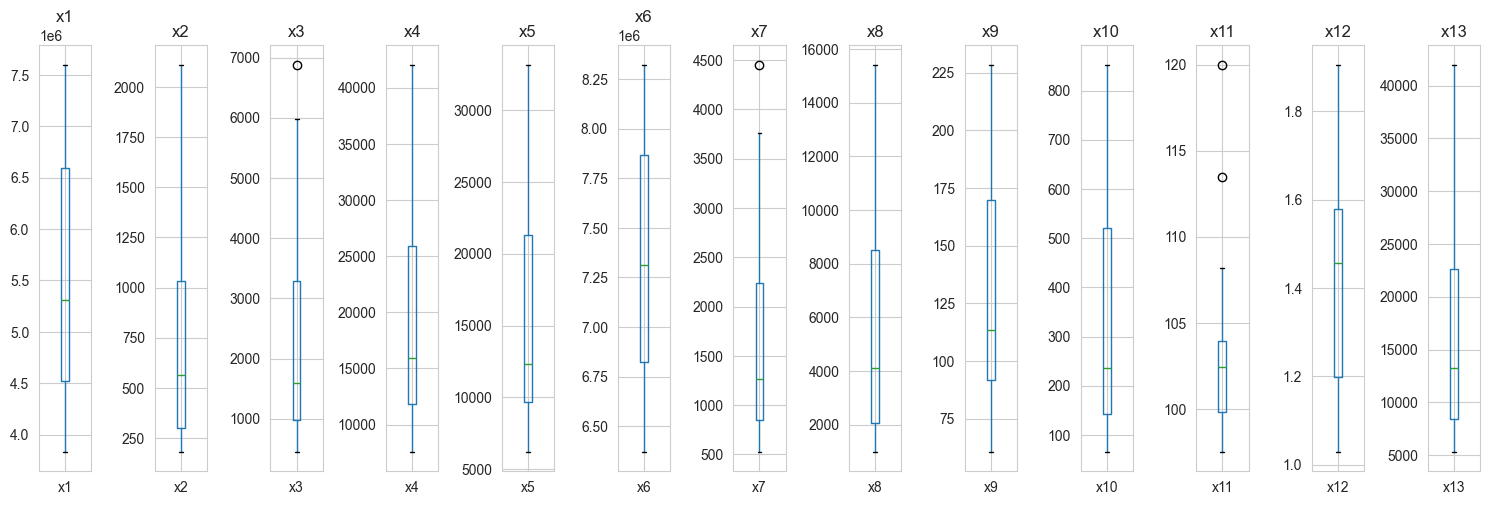

In [4]:
columns = data.columns[:-1]
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(15, 5))
for i, column in enumerate(columns):
    data[[column]].boxplot(ax=axes[i])
    axes[i].set_title(column)
plt.tight_layout()
plt.show()

相关性分析

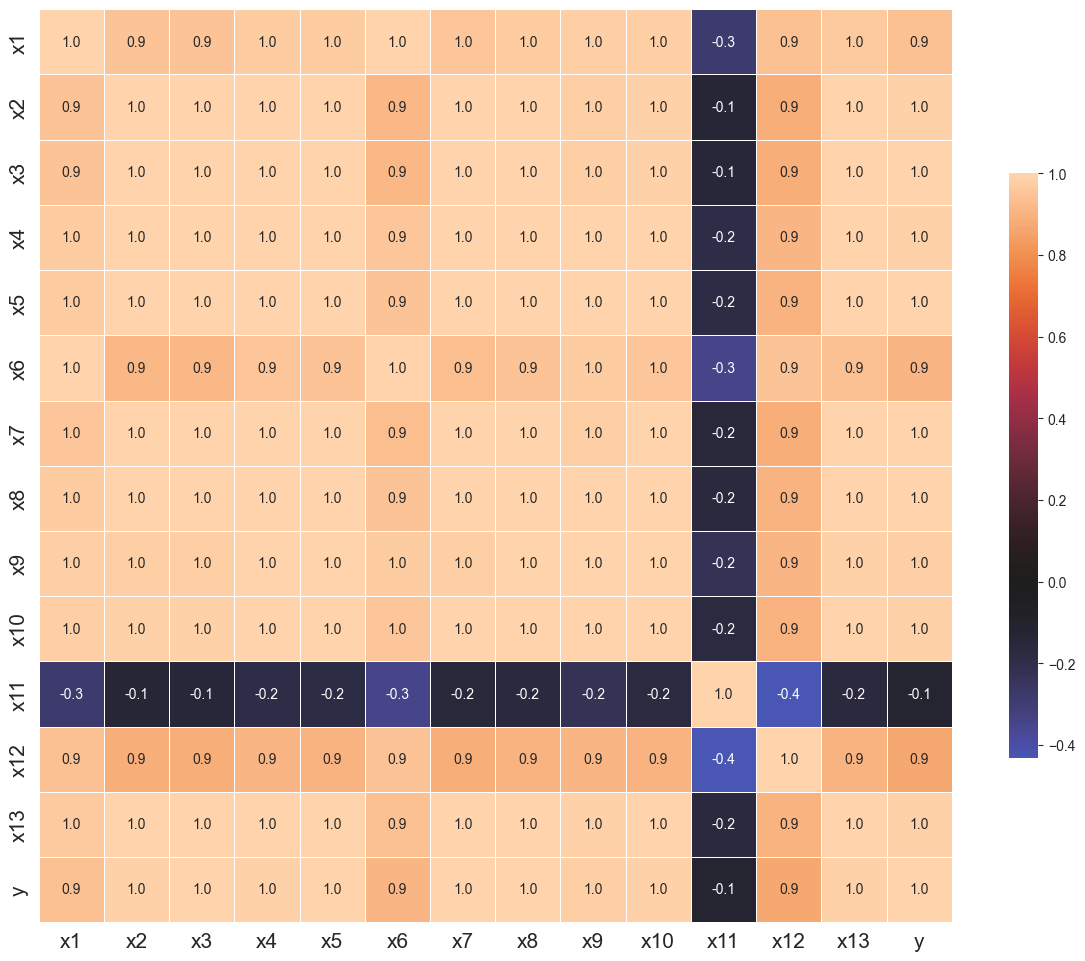

In [5]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True, fmt='.1f')
#设置x轴
plt.xticks(fontsize=15)
#设置y轴
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()

由图可知，居民消费价格指数（x11）与财政收入的线性关系不显著，而且呈现负相关。其余变量均与财政收入呈现高度的正相关关系。

C:\Users\J.wong\AppData\Local\Temp\ipykernel_53680\615626865.py:20: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


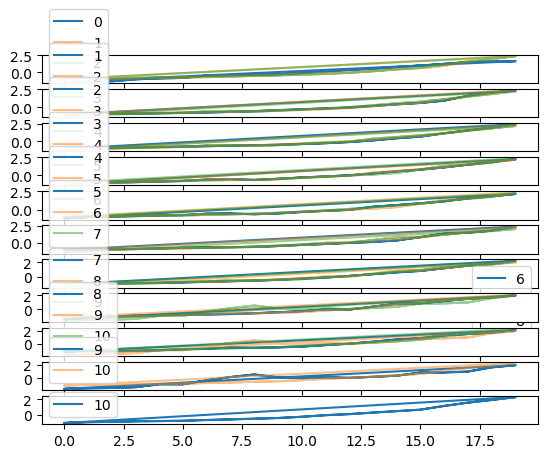

In [5]:
df1 = pd.DataFrame(np.load("data/x.npy"))
df2=pd.DataFrame(np.load("data/x.npy"))
df=pd.concat([df1,df2])
# 遍历每一列并进行绘图
for i, column in enumerate(df.columns):
    # 创建子图
    plt.subplot(len(df.columns), 1, i + 1)

    # 绘制当前列的曲线
    plt.plot(df.index, df[column], label=column)

    # 添加当前列的后两列之前的曲线并设置透明度
    for j in range(i + 1, min(i + 3, len(df.columns))):
        plt.plot(df.index, df.iloc[:, j], alpha=0.5, label=df.columns[j])

    # 设置图例
    plt.legend()

# 调整布局
plt.tight_layout()
# 显示图形
plt.show()